## Install sklearn

In [106]:
!pip install scikit-learn pandas


## Load the dataset

In [107]:
import pandas as pd

df = pd.read_csv("/Users/prabh/Projects/Cistra/dataset/cost-of-living-processed.csv")
df.head()


,City,meal_inexpensive,meal_midrange_2p,mcmeal,beer_domestic,beer_imported_bottle,soda,water,milk,bread,...,cappuccino,rice,tomatoes,bananas,onions,beef,car_price,pre_school,avg_primary_school,median
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,4.40
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43,3.82
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41,3.06
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00,8.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30,3.61


## Show columns 

In [108]:
df.columns

Index(['City', 'meal_inexpensive', 'meal_midrange_2p', 'mcmeal',
       'beer_domestic', 'beer_imported_bottle', 'soda', 'water', 'milk',
       'bread', 'eggs', 'cheese', 'water_large', 'wine',
       'beer_domestic_bottle', 'beer_imported_bottle.1', 'cigarettes',
       'ticket_oneway', 'chicken', 'monthly_pass', 'gasoline',
       'volkswagen_golf', 'apt1_centre', 'apt1_outside', 'apt3_centre',
       'apt3_outside', 'utilities', 'mobile_minute', 'avg_internet',
       'fitness_club', 'tennis_court', 'cinema', 'jeans', 'summer_dress',
       'nike_shoes', 'leather_shoes', 'sqm_buy_centre', 'sqm_buy_outside',
       'salary', 'interest_rate', 'taxi_start', 'taxi_1km', 'taxi_wait',
       'apples', 'oranges', 'potatoes', 'lettuce', 'cappuccino', 'rice',
       'tomatoes', 'bananas', 'onions', 'beef', 'car_price', 'pre_school',
       'avg_primary_school', 'median'],
      dtype='object')

## encode the cities

In [109]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])


## X and y 

In [110]:
X = df.drop(columns=['median'])
y = df['median']

## 70 - 30 % split for traning and testing

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.30,   # 30% testing
    random_state=42,  # keeps results consistent
    shuffle=True
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (112, 26)
Testing size: (48, 26)


## CATEGORY LISTS

In [127]:
# ----------------------------
# CATEGORY FEATURE GROUPS
# ----------------------------

food = [
    "meal_inexpensive", "meal_midrange_2p", "mcmeal",
    "bread", "eggs", "cheese", "milk",
    "water", "water_large",
    "apples", "oranges", "potatoes", "lettuce",
    "cappuccino", "rice", "tomatoes", "bananas", "onions",
    "chicken", "beef"
]

restaurants = [
    "meal_inexpensive", "meal_midrange_2p", "mcmeal",
    "beer_domestic", "beer_imported_bottle",
    "wine", "soda"
]

housing = [
    "apt1_centre", "apt1_outside",
    "apt3_centre", "apt3_outside",
    "sqm_buy_centre", "sqm_buy_outside",
    "utilities"
]

transport = [
    "ticket_oneway", "monthly_pass",
    "gasoline", "taxi_start", "taxi_1km", "taxi_wait"
]

internet_utils = [
    "avg_internet", "utilities"
]

lifestyle = [
    "jeans", "summer_dress", "nike_shoes", "leather_shoes",
    "cinema", "fitness_club", "tennis_court"
]


## category averages per city

In [133]:
df['food_avg'] = df[food].mean(axis=1) * 2.0
df['restaurants_avg'] = df[restaurants].mean(axis=1) * 1.2
df['housing_avg'] = df[housing].mean(axis=1) * 3.0
df['transport_avg'] = df[transport].mean(axis=1) * 1.5
df['internet_utils_avg'] = df[internet_utils].mean(axis=1) * 1.0
df['lifestyle_avg'] = df[lifestyle].mean(axis=1) * 0.7


## Ml Model

In [135]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=800,        # more trees = smoother predictions
    max_depth=30,            # deeper tree learns structure better
    min_samples_split=3,     # default
    min_samples_leaf=1,      # default
    max_features="sqrt",     # improves generalization
    bootstrap=True,          # better stability
    random_state=42
)

model.fit(X_train, y_train)
print("Model trained successfully with improved parameters!")


Model trained successfully with improved parameters!


## Evaluate Model

In [136]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)


print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.914060269608863
RMSE: 0.7181285556293665
MAE: 0.5170176192543035


## Important features

In [114]:
import pandas as pd
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
2,meal_midrange_2p,0.085595
18,chicken,0.076075
38,salary,0.070933
16,cigarettes,0.067051
4,beer_domestic,0.065088
23,apt1_outside,0.061612
31,cinema,0.056501
3,mcmeal,0.055654
40,taxi_start,0.038336
1,meal_inexpensive,0.033650


## Selected features

In [115]:
selected_features = [
    'apt1_centre', 'apt1_outside', 'apt3_centre', 'apt3_outside',
    'sqm_buy_centre', 'sqm_buy_outside',
    'salary',
    'gasoline', 'monthly_pass', 'volkswagen_golf',
    'utilities', 'avg_internet', 'mobile_minute',
    'milk', 'bread', 'eggs', 'chicken', 'rice', 'cheese', 'beef',
    'potatoes', 'bananas', 'tomatoes',
    'pre_school', 'avg_primary_school',
    'City'
]


## Build X again

In [116]:
X = df[selected_features]

## Retrain

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)


,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Install

In [118]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## BoxPlot

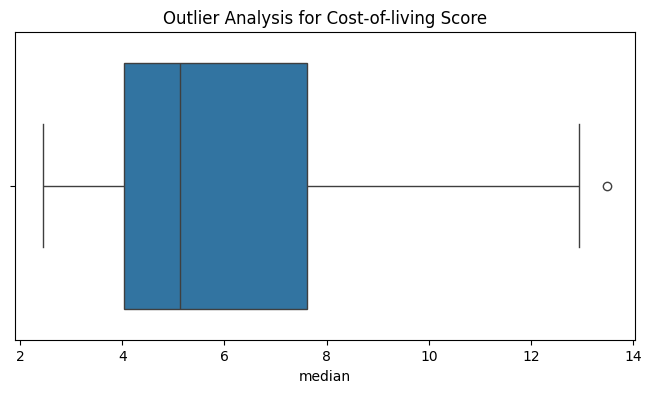

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x=df["median"])
plt.title("Outlier Analysis for Cost-of-living Score")
plt.show()

## Find City

In [140]:
le.classes_.tolist().index("Istanbul")


ValueError: 'Istanbul' is not in list

## Eva Again

In [144]:
city_id = 100  # Istanbul encoded value

# find row index where df["City"] == 120
rows = df.index[df["City"] == city_id].tolist()

if len(rows) == 0:
    print("San Diego not found in dataset")
else:
    idx = rows[0]

    # prepare the sample
    sample = X.loc[[idx]]
    predicted = model.predict(sample)[0]
    actual = y.loc[idx]

    print("City:", le.inverse_transform([city_id])[0])
    print("Predicted:", round(predicted, 3))
    print("Actual:", actual)


City: Odessa, Ukraine
Predicted: 3.87
Actual: 3.92


## Error Find

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on whole test set
y_pred = model.predict(X_test)

# Raw errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mean_error = np.mean(y_pred - y_test)

# Multiply everything by 100
mae_100 = mae * 100
mse_100 = mse * 100
rmse_100 = rmse * 100
mean_error_100 = mean_error * 100

print("========== ERROR REPORT (×100) ==========")
print(f"MAE ×100:       {mae_100:.2f}")
print(f"MSE ×100:       {mse_100:.2f}")
print(f"RMSE ×100:      {rmse_100:.2f}")
print(f"Mean Error ×100:{mean_error_100:.2f}")


========== ERROR REPORT (×100) ==========
MAE ×100:       51.70
MSE ×100:       51.57
RMSE ×100:      71.81
Mean Error ×100:1.98


## Report

In [131]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error
)
import numpy as np

def regression_report(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("========== Regression Report ==========")
    print(f"R² Score:               {r2_score(y_test, y_pred):.4f}")
    print(f"MAE (Mean Abs Error):   {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE (Root MSE):        {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"Median Abs Error:       {median_absolute_error(y_test, y_pred):.4f}")

    print("\nSample Predictions:")
    print("-------------------")
    for i in range(5):
        idx = X_test.sample(1).index[0]
        actual = y_test.loc[idx]
        pred = model.predict(X_test.loc[[idx]])[0]
        city_encoded = df.loc[idx, "City"]
        city_name = le.inverse_transform([city_encoded])[0]
        
        print(f"{city_name}: Pred = {round(pred, 3)}, Actual = {actual}")




# Run the report


In [ ]:
regression_report(model, X_test, y_test)

========== Regression Report ==========
R² Score:               0.9145
MAE (Mean Abs Error):   0.5168
RMSE (Root MSE):        0.7162
Median Abs Error:       0.4106

Sample Predictions:
-------------------
Novosibirsk, Russia: Pred = 3.974, Actual = 4.4
Manila, Philippines: Pred = 4.222, Actual = 3.13
Edmonton, Canada: Pred = 8.059, Actual = 8.45
Novosibirsk, Russia: Pred = 3.974, Actual = 4.4
Krakow (Cracow), Poland: Pred = 4.613, Actual = 4.72


## Save Model

In [124]:
import joblib

joblib.dump(model, "cost_of_living_model.pkl")
print("Model saved successfully!")


Model saved successfully!
